In [1]:
#import all the module which we are needed
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

In [2]:
#connecting to database csv file using URL
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
#assing the dabase in data variable
data = pd.read_csv(url)
print("Data imported successfully")
data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking whether the dataset is empty(null) or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
#all the description of dataset like mean,min,count
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
#all the innformation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


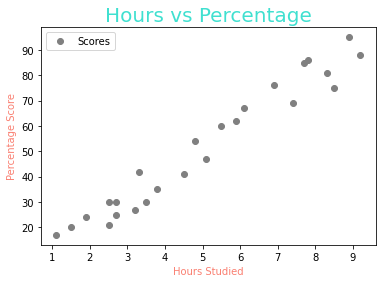

In [6]:
#plotting the graph of dataset hours vs percentage
data.plot(x='Hours', y='Scores', style='o',color='#808080')  
plt.title('Hours vs Percentage',color='#40E0D0',fontsize=20)  
plt.xlabel('Hours Studied',color='#FA8072',fontsize=10)  
plt.ylabel('Percentage Score',color='#FA8072',fontsize=10)  
plt.show()

In [7]:
#taking input variables
X =data.iloc[:, :-1].values  # it takes 1column as input variable- independent variable  
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [8]:
#taking output variables
y =data.iloc[:, 1].values  # output variable- dependent variable
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [9]:
#spliting the data into 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [10]:
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [11]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [12]:
#selecting linear regreassion model for performing the task
regressor=LinearRegression()

In [13]:
#fit the model
regressor.fit(X_train,y_train) 

LinearRegression()

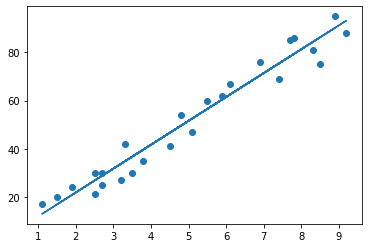

In [14]:
line = regressor.coef_*X+regressor.intercept_
#Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [15]:
y_pred = regressor.predict(X_test)

In [16]:
#comparing the value of actal and predicted values
df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [17]:
#finding the acuracy of data
print('Accuracy: ',regressor.score(X,y)*100)

Accuracy:  95.26947647057274


In [18]:
#calculating mean sqaure error
mse=mean_squared_error(y_test,y_pred)
mse

21.598769307217406

In [19]:
#calculating Root mean square error
rmse=math.sqrt(mse)
rmse

4.647447612100367

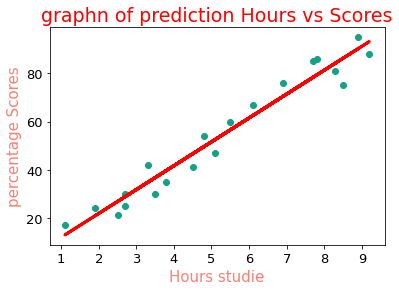

In [21]:
#plotting the graph of input(independent) ouput(depent) varible to examine the outlier
plt.scatter(X_train,y_train,color='#16A085') 
plt.plot(X_train,regressor.predict(X_train),color='red',linewidth=3)
plt.title("graphn of prediction Hours vs Scores",fontsize=19,color='red')
plt.xlabel('Hours studie',color='#FA8072',fontsize=15)
plt.ylabel('percentage Scores',color='#FA8072',fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [25]:
#importing tkinter for the gui of score calculater according to in input as hours studied
from tkinter import *
import tkinter.messagebox as mBox

root=Tk()
root.title("Percentage Scores calculator")
root.geometry('550x350')
label1=Label(root,text="Percentage Scores",font=(7))
label1.place(x=170,y=10)
frame=Frame(root)
frame.pack()

def hourscore():
    Hours=txt2.get()
    ablist=[float(Hours)]
    X_new=np.array([ablist])
    y_new = regressor.predict(X_new)
    str1="Your calculated Scores are : "+str(y_new) 
    Label3=Label(root,text=str1,bd=2,bg='black',fg='white',width=40,font=(5))
    Label3.place(x=20,y=140)
    
Label2=Label(root,text="Enter Hours",bd=2,bg='white',fg='Black',width=10,font=(7))   
Label2.place(x=20,y=90)
    
txt2=Entry(root,width=20,font=(7))
txt2.place(x=150,y=90)

button=Button(root,text="Calculate Score",command=hourscore,font=(7))
button.place(x=150,y=220)

root.mainloop()